# Content of this talk

- Why do you need pandas?
- Basic introduction to pandas data structures

# Why do you need pandas?

When working with *tabular or structured data* (like R dataframe, SQL table, Excel spreadsheet, ...):

- Import data
- Clean up messy data
- Explore data, gain insight into data
- Process and prepare your data for analysis
- Analyse your data (together with scikit-learn, statsmodels, ...)

## Why you should learn Pandas
As humans interact more and more with technology, vast amounts of data are being generated each day. Hence, the ability to analyse these data and draw insights from them is becoming an increasingly important skill to have in the modern workforce. Organisations are progressively turning to data to help them better understand their customers and products, analyse past trends and patterns, improve operational efficiency and so on.

Here are just some of the many reasons why you should learn pandas:

- By learning pandas, you learn the fundamental ideas behind working with data as well as some skill and knowledge to code in Python
- It is straightforward to learn and you can immediately apply it to any dataset you want
- It is commonly used in the data science and machine learning community

# Pandas: data analysis in python

For data-intensive work in Python the [Pandas](http://pandas.pydata.org) library has become essential.

What is ``pandas``?

* Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language.



* Powerful for working with missing data, working with time series data, for reading and writing your data, for reshaping, grouping, merging your data, ...

It's documentation: http://pandas.pydata.org/pandas-docs/stable/

## Key features

* Fast, easy and flexible input/output for a lot of different data formats
* Working with missing data (`.dropna()`, `pd.isnull()`)
* Merging and joining (`concat`, `join`)
* Grouping: `groupby` functionality
* Reshaping (`stack`, `pivot`)
* Powerful time series manipulation (resampling, timezones, ..)
* Easy plotting

# Basic data structures

Pandas does this through two fundamental object types, both built upon NumPy arrays: the ``Series`` object, and the ``DataFrame`` object.

### Pandas data table representation
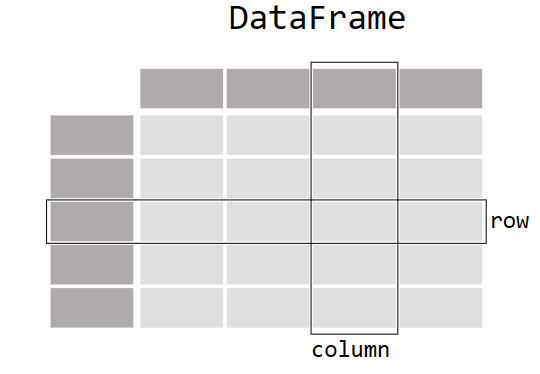

### Each column in a DataFrame is a Series

## Series

A Series is a basic holder for **one-dimensional labeled data**. It can be created much as a NumPy array is created:

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

pd.options.display.max_rows = 8

In [ ]:
s = pd.Series([0.1, 0.2, 0.3, 0.4])
s

### Attributes of a Series: `index` and `values`

The series has a built-in concept of an **index**, which by default is the numbers *0* through *N - 1*

In [ ]:
s.index

In [ ]:
s.values

We can access series values via the index, just like for NumPy arrays:

In [ ]:
s[0]

Unlike the NumPy array, though, this index can be something other than integers:

In [ ]:
s2 = pd.Series(np.arange(4), index=['a', 'b', 'c', 'd'])
s2

In [ ]:
s2['c']

In [ ]:
population = pd.Series({'Germany': 81.3, 'Belgium': 11.3, 'France': 64.3, 'United Kingdom': 64.9, 'Netherlands': 16.9})
population

In [ ]:
population['France']

but with the power of numpy arrays:

In [ ]:
population * 1000

We can index or slice the populations as expected:

In [ ]:
population['Belgium']

In [ ]:
population['Germany':'France']

Fancy indexing, like indexing with a list or boolean indexing:

In [ ]:
population[['France', 'Netherlands']]

In [ ]:
population[population > 20]

Element-wise operations:

In [ ]:
population / 100

A range of methods:

In [ ]:
population.mean()

## Alignment!
Only, pay attention to alignment: operations between series will align on the index:

In [ ]:
s1 = population[['Belgium', 'France']]
s2 = population[['France', 'Germany']]

In [ ]:
s1

In [ ]:
s2

In [ ]:
s1 + s2

## DataFrames: Multi-dimensional Data

A DataFrame is a **tablular data structure** (multi-dimensional object to hold labeled data) comprised of rows and columns, akin to a spreadsheet, database table, or R's data.frame object. You can think of it as multiple Series object which share the same index.


One of the most common ways of creating a dataframe is from a dictionary of arrays or lists.


In [ ]:
data = {'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
        'population': [11.3, 64.3, 81.3, 16.9, 64.9],
        'area': [30510, 671308, 357050, 41526, 244820],
        'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']}
countries = pd.DataFrame(data)
countries

In [ ]:
countries.columns

To check the data types of the different columns:

In [ ]:
countries.dtypes

An overview of that information can be given with the `info()` method:

In [ ]:
countries.info()

If we don't like what the index looks like, we can reset it and set one of our columns:

In [ ]:
countries = countries.set_index('country')
countries

To access a Series representing a column in the data, use typical indexing syntax:

In [ ]:
countries['area']

Adding a new column to the dataframe is very simple:

In [ ]:
countries['density'] = countries['population']*1000000 / countries['area']
countries

We can use masking to select certain data:`

In [ ]:
countries[countries['density'] > 300]

One useful method to use is the ``describe`` method, which computes summary statistics for each column:es.

In [ ]:
countries.describe()

The `plot` method can be used to quickly visualize the data in different ways:

In [ ]:
countries.plot()

In [ ]:
countries['population'].plot(kind='bar')

## Some notes on selecting data

One of pandas' basic features is the labeling of rows and columns, but this makes indexing also a bit more complex compared to numpy. We now have to distuinguish between:

- selection by label
- selection by position.

For a DataFrame, basic indexing selects the columns.

Selecting a single column:

In [ ]:
countries.head()

In [ ]:
countries['area']

or multiple columns:

In [ ]:
countries[['area', 'population']]

But, slicing accesses the rows:

In [ ]:
countries['France':'Netherlands']

For more advanced indexing, you have some extra attributes:
    
* `loc`: selection by label
* `iloc`: selection by position

In [ ]:
countries.loc['Germany', 'area']

In [ ]:
countries.loc['France':'Germany', :]

In [ ]:
countries.loc[countries['density']>300, ['capital', 'population']]

Selecting by position with `iloc` works similar as indexing numpy arrays:

In [ ]:
countries.iloc[0:2,1:3]

The different indexing methods can also be used to assign data:

In [ ]:
countries.loc['Belgium':'Germany', 'population'] = 10

In [ ]:
countries

There are many, many more interesting operations that can be done on Series and DataFrame objects, but rather than continue using this toy data, we'll instead move to a real-world example, and illustrate some of the advanced concepts along the way.

## Case Study

## Read the dataset

In [ ]:
titanic = pd.read_csv("titanic.csv")

### Getting the glimpse of Data 

In [ ]:
titanic.head()

In [ ]:
###print first 8 rows of dataset
titanic.head(8)

In [ ]:
###print last 5 rows of dataset
titanic.tail()

In [ ]:
###print last 8 rows of dataset
titanic.tail(8)

## Getting detailed summary of dataframe

In [ ]:
## summary of dataframe
titanic.info()

In [ ]:
###Data types of each column
titanic.dtypes

## Renaming columns

In [ ]:
titanic.head()

In [ ]:
# Suppose we want to change the names of the first two columns
titanic.rename(columns = {'Survived': 'Surv', 'Pclass': 'class'}, inplace = True)
titanic.head()

In [ ]:
titanic = pd.read_csv("titanic.csv")

## Dropping columns and rows
There are a few of ways you can drop columns or rows from your dataframe. In this example, I am only focusing on the 'drop' function.

In [ ]:
# Drop the 'Name' column

titanic.drop(columns = 'Name')

In [ ]:
# Drop row with id 478
titanic.drop(478)

## Subsetting data
### Selecting specific columns from data

There are two ways you can select a column of a dataframe.

- titanic.Name
- titanic['Name']

In [ ]:
# Let's first try out it out on the Name feature

titanic.Name

In [ ]:
titanic['Name']

## Index-based selection

We use iloc to select data based on their numerical position in the dataframe.

iloc takes two argument, first is row followed by column. It has a starting index of 0 that is 0 is first, 1 is second, 2 is third and so on.

In [ ]:
titanic.head()

In [ ]:
# First row and all columns
titanic.iloc[0, :]

In [ ]:
# Fourth column that is the Name column and all rows
# Since starting index is 0 fourth column corresponds to index number 3
titanic.iloc[:, 3]

Suppose we want to select a range of values.

iloc includes the first number but exclude the last number of the range. For example, if we want the second and third row of the first column, the code is as follows:

In [ ]:
# Second and third rows of the first 
titanic.iloc[1:3, 0]

We can also pass in a list or series into iloc



In [ ]:
# First three rows and all columns
titanic.iloc[[0, 1, 2], :]

We can also go from the bottom of the dataframe.



In [ ]:
# Bottom five rows of the dataframe
titanic.iloc[-5:, :]

## Label-based selection

With loc we need to specify the actual name of the column.



In [ ]:
# First row of the Name column
titanic.loc[0, 'Name']

### Different to iloc, when we want to select a range of values, loc includes both the start as well as the end of the range.

For example, to get the first 5 rows under `iloc` we would have `titanic[:5]` whereas for `loc` we have `titanic[:4]` instead.





In [ ]:
# First 5 rows of the Name, Sex and Age column
titanic.loc[:4, ['Name', 'Sex', 'Age']]

## Conditional Selection

In [ ]:
# Rows with age 50
titanic.loc[titanic['Age'] == 50, :]

In [ ]:
# Rows with age 50 AND are female
# This is a subset of the above dataframe by filtering out females
titanic.loc[(titanic['Age'] == 50) & (titanic['Sex'] == 'female') ,:]

In [ ]:
# Rows with age 50 OR have fare greater than or equal to 200
titanic.loc[(titanic['Age'] == 50) | (titanic['Fare'] >= 200), :]

In [ ]:
# All the rows with null cabin column
titanic.loc[titanic['Cabin'].isnull(), :]

## Summary statistics for Data

In [ ]:
###Mean age of passengers
titanic["Age"].mean()

In [ ]:
###Median age and fare
titanic[["Age", "Fare"]].median()

In [ ]:
###Detailed summary statistics
titanic[["Age", "Fare"]].describe()

### Aggregating statistics (usually for categorical variables)

### Aggregating for single variable/column

In [ ]:
titanic.head()

In [ ]:
### Compute mean of Age by Sex
titanic.groupby("Sex")["Age"].mean()

### Aggregating by multiple columns

In [ ]:
### Compute mean age of passengers grouped by class
titanic[["Age", "Pclass"]].groupby("Pclass").mean()

In [ ]:
### Compute mean age of passengers grouped by sex
titanic[["Age", "Sex"]].groupby("Sex").mean()

### Count the number of categorical variables


In [ ]:
### Number of passengers in each class
titanic["Pclass"].value_counts()

In [ ]:
### Number of males and females
titanic["Sex"].value_counts()

## Combining Dataframes

When working with multiple datasets during a project, there will come a point where you might wish to merge your dataframes together to have a better view and understanding of your data.

In this tutorial, we will cover two pandas functions, and they are `concat and merge` that are used to combine dataframes.

## Concat

Concat is short for concatenate. This function allows to stack two separate dataframes both vertically and horizontally.

Let's observe this with an example.

In [ ]:
df1 = pd.DataFrame({'Name': ['Vicky', 'Bill'], 'Age': [12, 46]})
df2 = pd.DataFrame({'Name': ['John', 'Sabrina'], 'Age': [37, 25]})
df1

In [ ]:
df2

There is an argument called axis within the concat function that you can use to specify which way you would like to stack your dataframe. 1 means horizontal whereas 0 means vertical. If you do not specify, pandas assumes 0 as its default.

In [ ]:
# Concat horizontally
pd.concat([df1, df2], axis = 1)

In [ ]:
# Concat vertically and ignore index
df3 = pd.concat([df1, df2], axis = 0)
df3

There is another argument called `join` which allows you to stack dataframes only based on the columns shared by two dataframes.



In [ ]:
df4 = pd.DataFrame({'Name': ['Tyler', 'Natalie'], 'Age': [28, 39], 'Hobby': ['Swimming', 'Reading']})
df4

In [ ]:
# Outer is the default for the join argument
pd.concat([df3, df4], join = 'outer', ignore_index = True)

Outer does not consider any differences in columns between two dataframe. Because df3 does not have a hobby column, pandas will automatically fill them with null values.

In [ ]:
# Inner stacks only the columns that are shared between the two dataframes
pd.concat([df3, df4], join = 'inner', ignore_index = True)

## Additional Resources for learning Pandas
- https://github.com/TirendazAcademy/PANDAS-TUTORIAL
- https://www.youtube.com/playlist?list=PL1xVF1dBM4bmy13VIiL0mD8mZQ40XePWw
- https://github.com/tommyod/awesome-pandas